In [1]:
import os
import pandas as pd
import numpy as np

from fontTools.ttLib import TTFont
from fontTools.pens.svgPathPen import SVGPathPen

import svgpath2mpl
from svgpath2mpl import parse_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
fdir = '../ff/'
#os.listdir(fdir)
fnam = 'ff2.ttf'
font = TTFont(fdir+fnam)

In [3]:
# cmap = font.getBestCmap()
# cmap

In [4]:
cdict = {
    #symbols
    '!': 'exclam',
    '"': 'quotedbl',
    '$': 'dollar',
    '%': 'percent',
    "'": 'quotesingle',
    '(': 'parenleft',
    ')': 'parenright',
    '*': 'asterisk',
    ',': 'comma',
    '-': 'hyphen',
    '.': 'period',
    ':': 'colon',
    ';': 'semicolon',
    '<': 'less',
    '=': 'equal',
    '>': 'greater',
    '?': 'question',
    '@': 'at',
    #numbers
    '0': 'zero',
    '1': 'one',
    '2': 'two',
    '3': 'three',
    '4': 'four',
    '5': 'five',
    '6': 'six',
    '7': 'seven',
    '8': 'eight',
    '9': 'nine',
    #grave
    'À':'Agrave',
    'È':'Egrave',
    'Ì':'Igrave',
    'Ò':'Ograve',
    'Ù':'Ugrave',
    'à':'agrave',
    'è':'egrave',
    'ì':'igrave',
    'ò':'ograve',
    'ù':'ugrave',
    #acute
    'Á':'Aacute',
    'É':'Eacute',
    'Í':'Iacute',
    'Ó':'Oacute',
    'Ú':'Uacute',
    'á':'aacute',
    'é':'eacute',
    'í':'iacute',
    'ó':'oacute',
    'ú':'uacute',
    #macron
    'Ā':'Amacron',
    'Ē':'Emacron',
    'Ī':'Imacron',
    'Ō':'Omacron',
    'Ū':'Umacron',
    'ā':'amacron',
    'ē':'emacron',
    'ī':'imacron',
    'ō':'omacron',
    'ū':'umacron',
    #breve
    'Ă':'Abreve',
    'Ĕ':'Ebreve',
    'Ĭ':'Ibreve',
    'Ŏ':'Obreve',
    'Ŭ':'Ubreve',
    'ǎ':'abreve',
    'ě':'ebreve',
    'ǐ':'ibreve',
    'ǒ':'obreve',
    'ǔ':'ubreve',
}
#cdict['ū']
clist = list(cdict.keys())

In [5]:
txts = [
    'Philosophical dialogue',
    '2023',
    'Circle Press',
    '(name, meaning "strong and powerful")',
    'What is the world?',
    '(name, meaning "to protect and flower")',
    'The world is the place where we live.',
    '  ',
    'Then, what is a person?',
    '  ',
    'A person is a part of the world, a conscious being.',
    '  ',
    'Why does a person exist?',
    '  ',
    'This is a deep question with many different viewpoints.',
    'Some people believe that a person exists to fulfill some purpose,',
    'while others believe that a person exists because it is a law of the universe.',
]

0


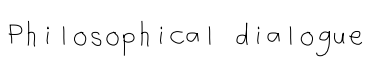

1


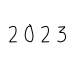

2


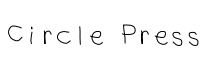

3


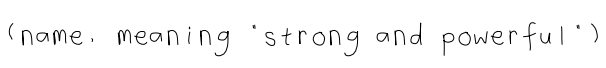

4


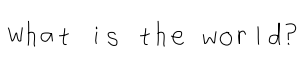

5


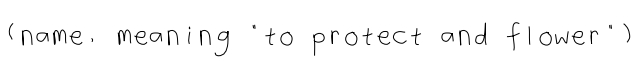

6


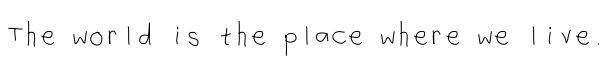

7


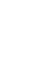

8


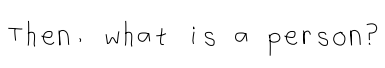

9


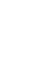

10


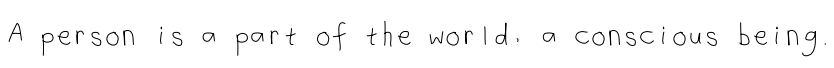

11


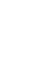

12


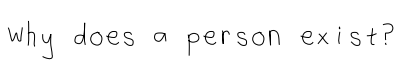

13


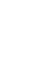

14


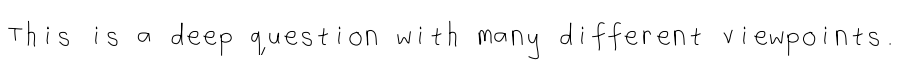

15


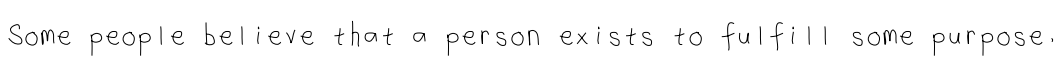

16


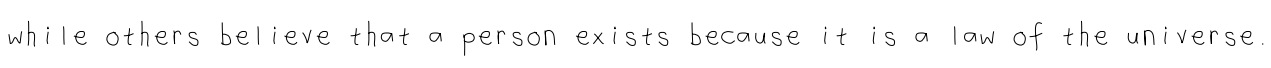

In [6]:
for x in range(len(txts)):
    #x = 14
    print(x)
    txt = txts[x]
    # txt='Nǐ hǎo, nǐ zěnme yàng'
    # txt
    sca = 1
    gpx = 10
    gpy = 10
    fig, axs = plt.subplots(1, len(txt), figsize=((len(txt)*sca)/4, sca))
    for t in range(len(txt)):
        char = txt[t]
        if char in clist:
            char = cdict[char]
        #char = 'a'
        #
        if char != ' ': # Handle spaces
            glyphSet = font.getGlyphSet()
            svgpen = SVGPathPen(glyphSet)
            glyph = glyphSet[char]
            #
            glyph.draw(svgpen)
            cpath = svgpen.getCommands()
            cpath = cpath.replace('Z','') # replace 'Z' = 'closepath'
            #cpath
            #
            pcpath = svgpath2mpl.parse_path(cpath)
            vv = pcpath.vertices
            vdf = pd.DataFrame(vv)
            vxmi = vdf[0].min()
            vxma = vdf[0].max()
            vymi = vdf[1].min()
            vyma = vdf[1].max()
            #
            #
            patch = mpl.patches.PathPatch(
                pcpath, 
                facecolor='none', 
                edgecolor='black', 
                linewidth=1)
            patch.set_transform(axs[t].transData)
            axs[t].add_patch(patch)
            axs[t].set_aspect(1)
            axs[t].axis("off")
            axs[t].set_xticklabels([])
            axs[t].set_yticklabels([])
            axs[t].set_xlim([vxmi-50, vxma+50])
            axs[t].set_ylim([-350, 1100])
        else:
            axs[t].set_aspect(1)
            axs[t].axis("off")
            axs[t].set_xlim([0, 400])
            axs[t].set_ylim([-350, 1100])
    #
    fig.subplots_adjust(left=0, wspace=0, hspace=0)
    plt.savefig("out/phidia_e"+str(x)+".svg")
    plt.show()